# Digit Recognizer | Kaggle | XGBoost
https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

## Load data

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

> To do feature scaling, the type of values should be float.(?)

In [12]:
initial_X = X_train.values.astype('float32')
initial_X_test = X_test.values.astype('float32')
initial_y = y_train.values.ravel()
initial_y_test = y_test.values.ravel()
print(initial_X.shape)
print(initial_X_test.shape)
print(initial_y.shape)
print(initial_y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(initial_X)
X_test_scaled = scaler.transform(initial_X_test)

In [14]:
eval_set = [(X_test_scaled, initial_y_test)]
xgb_clf = xgb.XGBClassifier(learning_rate=0.3, max_depth=6, nthread=2, subsample=0.7)

## Training

In [16]:
xgb_clf.fit(X_scaled, initial_y, eval_set = eval_set, eval_metric='mlogloss', early_stopping_rounds=10)

[0]	validation_0-mlogloss:1.39099
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.06454
[2]	validation_0-mlogloss:0.857728
[3]	validation_0-mlogloss:0.707585
[4]	validation_0-mlogloss:0.597482
[5]	validation_0-mlogloss:0.513043
[6]	validation_0-mlogloss:0.446796
[7]	validation_0-mlogloss:0.393655
[8]	validation_0-mlogloss:0.351388
[9]	validation_0-mlogloss:0.316409
[10]	validation_0-mlogloss:0.288518
[11]	validation_0-mlogloss:0.265168
[12]	validation_0-mlogloss:0.245144
[13]	validation_0-mlogloss:0.228838
[14]	validation_0-mlogloss:0.214901
[15]	validation_0-mlogloss:0.202806
[16]	validation_0-mlogloss:0.193059
[17]	validation_0-mlogloss:0.184017
[18]	validation_0-mlogloss:0.176305
[19]	validation_0-mlogloss:0.169672
[20]	validation_0-mlogloss:0.163005
[21]	validation_0-mlogloss:0.157328
[22]	validation_0-mlogloss:0.151776
[23]	validation_0-mlogloss:0.148107
[24]	validation_0-mlogloss:0.143929
[25]	validation_0-mlogloss:0.140551
[26]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=2, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [17]:
y_predict = xgb_clf.predict(X_test_scaled)
np.mean(y_predict==initial_y_test)

0.97250000000000003

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(initial_y_test, y_predict)
accuracy

0.97250000000000003

In [19]:
xgb_clf.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=2, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)>

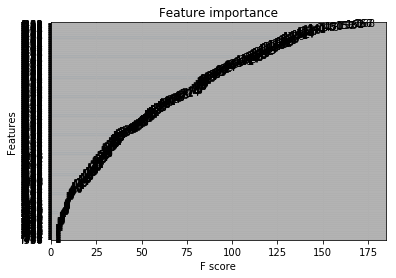

In [20]:
from xgboost import plot_importance
plot_importance(xgb_clf)

## Result for Kaggle 

In [21]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
final_test_X = test_data.values.astype('float32')
final_test_X.shape

(28000, 784)

In [23]:
final_test_X_scaled = scaler.transform(final_test_X)

In [24]:
my_predict = xgb_clf.predict(final_test_X_scaled)

In [25]:
int_my_predict = my_predict.astype('int64')
int_my_predict.shape

(28000,)

In [26]:
result = pd.DataFrame(int_my_predict)

In [27]:
result.head()

,0
0,2
1,0
2,9
3,9
4,3


In [28]:
result.index+=1
result.columns=['Label']
result.head()

,Label
1,2
2,0
3,9
4,9
5,3


In [29]:
result.index.name='ImageId'

In [30]:
result.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [31]:
result.to_csv('data/results_xgb.csv', header=True)

> get score = 0.96771